 # SVM
 
## GENDER =  SMOKES + DRUGS


In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("profiles.csv")
df[0:3]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [3]:
fig, ax = plt.subplots()

In [4]:
drug_mapping = {"never":0, "sometimes":1, "often":2}
df["drugs_code"] = df.drugs.map(drug_mapping)

In [5]:
smoke_mapping = {"no":0, "when drinking":1, "sometimes":2, "trying to quit":3, "yes":4}
df["smokes_code"]=df.smokes.map(smoke_mapping)

In [6]:
df.sex=df.sex.map({'m':0, 'f':1})

In [7]:
df.sex.head()

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [8]:
#Knowing drugs and smokes characteristics of the person we can tell if it was Male or Female
#Before we run algorithm we should remove any NaN 
df = df.dropna(subset = ['sex', 'smokes_code', 'drugs_code'])

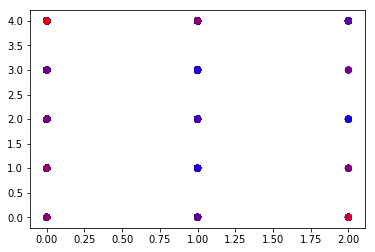

In [9]:
#Lets plot the data
plt.scatter(x=df.drugs_code,
             y=df.smokes_code,
             c=df.sex,
             cmap=plt.cm.bwr,
             alpha=0.25)
plt.show()

In [10]:
#lets normalize the data and plot to see the results
feature_data = df[['smokes_code', 'drugs_code']]
x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

In [11]:
feature_data.head()

,smokes_code,drugs_code
0,0.5,0.0
1,0.0,0.5
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


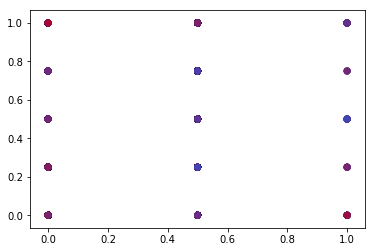

In [12]:
plt.scatter(x=feature_data.drugs_code,
             y=feature_data.smokes_code,
             c=df.sex,
             cmap=plt.cm.coolwarm,
             alpha=0.25)
plt.show()

In [13]:
#Now we will split the data 
training_set,validation_set = train_test_split(df,random_state=1)

In [14]:
#Here we run classifier, for now gamma=1, C=3 
classifier = SVC(kernel = 'rbf', gamma = 1, C=3)
classifier.fit(training_set[['drugs_code', 'smokes_code']], training_set.sex)
score = classifier.score(validation_set[['drugs_code', 'smokes_code']], validation_set.sex)
print(score)

0.590909090909


In [16]:
#The score is not impessive. Lets see if we can find better gamma and C

largest = {'value':0, 'gamma':1, 'C':1}
for gamma in range(1,10):
    for C in range(1,10):
        classifier = SVC(kernel = 'rbf', gamma = gamma, C=C)
        classifier.fit(training_set[['drugs_code', 'smokes_code']], training_set.sex)
        score = classifier.score(validation_set[['drugs_code', 'smokes_code']], 
                                 validation_set.sex)
        if (score > largest['value']):
            largest['value'] = score
            largest['gamma'] = gamma
            largest['C'] = C            
print (largest)  

{'value': 0.59090909090909094, 'gamma': 1, 'C': 1}


In [17]:
#The score alnmost the same, run time = 30 min. It didnt worth 